In [ ]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
#loading the data file
football_data = pd.read_csv("/content/Football_data_merged_cleaned_data (3).csv")
football_data.head()

appearance_id  game_id_x  player_id_x competition_id_x  yellow_cards  \
0  2231426_49723    2231426        49723               L1             0   
1  2231426_49723    2231426        49723               L1             0   
2  2231426_49723    2231426        49723               L1             0   
3  2231426_49723    2231426        49723               L1             0   
4  2231426_49723    2231426        49723               L1             0   

   red_cards  goals  assists  minutes_played  season  ... height_in_cm  \
0          0      0        0              70    2012  ...        186.0   
1          0      0        0              70    2012  ...        186.0   
2          0      0        0              70    2012  ...        186.0   
3          0      0        0              70    2012  ...        186.0   
4          0      0        0              70    2012  ...        186.0   

   market_value_in_eur  highest_market_value_in_eur  \
0             700000.0                    5000000.0   
1             700000.0                    5000000.0   
2             700000.0                    5000000.0   
3             700000.0                    5000000.0   
4             700000.0                    5000000.0   

        contract_expiration_date                   game_lineups_id  \
0  2025-06-30 00:00:00.000000000  8d717b1017e72d89d2ee1112bb2d7466   
1  2025-06-30 00:00:00.000000000  d53eb3fd74523d6dd4536653c145ae96   
2  2025-06-30 00:00:00.000000000  3efc21c645e46b2f411bcdb1710aa444   
3  2025-06-30 00:00:00.000000000  cc79e78c570ce19872dfed125d324407   
4  2025-06-30 00:00:00.000000000  21de58902f547e231bf2604be9fa996f   

        type_y number     player_name_y  team_captain  position_y  
0  substitutes     22  Timothy Chandler             0  Right-Back  
1  substitutes     22  Timothy Chandler             0  Right-Back  
2  substitutes     22  Timothy Chandler             0  Right-Back  
3  substitutes     22  Timothy Chandler             0  Right-Back  
4  substitutes     22  Timothy Chandler             0  Right-Back  

[5 rows x 48 columns]

**K_Means Clustering:player attributes and demographics**

In [ ]:
df = pd.DataFrame(football_data)

In [ ]:
df['gola_contribution_ratio'] = df['goals'] / (df['goals']+df['assists']+1)

In [ ]:
df['gola_contribution_ratio'].value_counts()

gola_contribution_ratio
0.000000    2594
0.500000    1287
0.333333     182
0.666667      66
0.750000      42
0.250000      28
Name: count, dtype: int64

In [ ]:
#age distribution(derived from date_of-birth)
df['age']=pd.to_datetime('today') - pd.to_datetime(df['date_of_birth'])
df['age'] = df['age'].dt.days//365  #convert to years

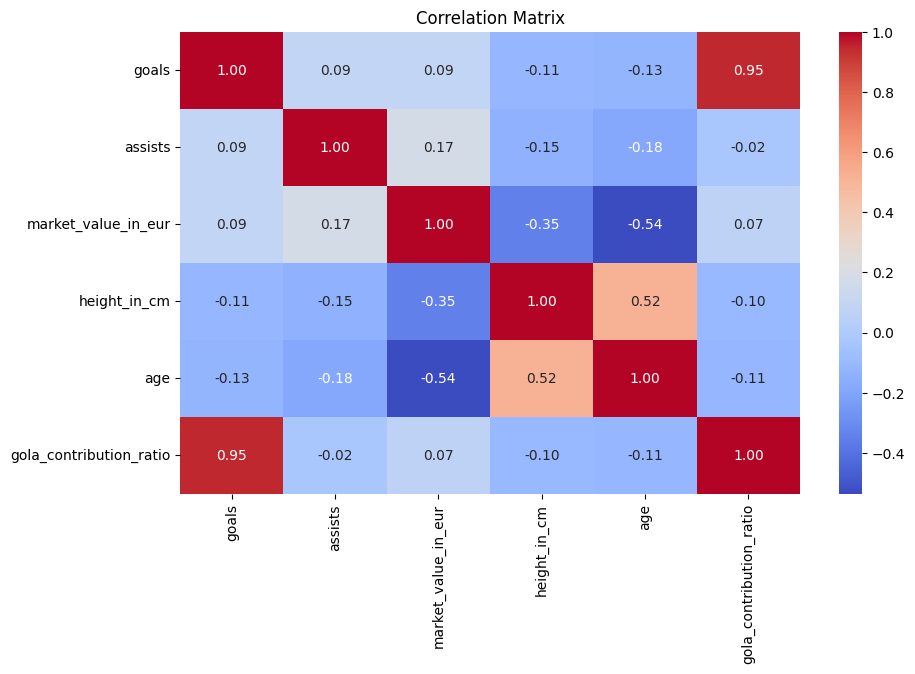

In [ ]:
correlation_matrix = df[['goals','assists','market_value_in_eur','height_in_cm','age','gola_contribution_ratio']].corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#select relevant features for clustering
df_clustering = df[['goals','assists','market_value_in_eur','height_in_cm','age','gola_contribution_ratio']]


In [ ]:
#scaling the features to normalize them
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clustering)

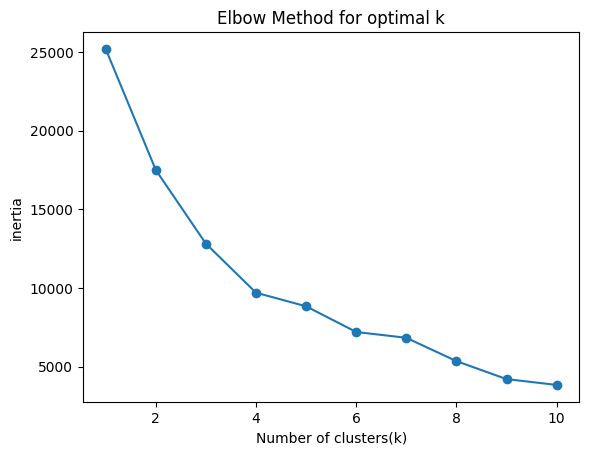

In [ ]:
#Elbow method:to choose the optimal number of clusters
inertia = []
for k in range(1,11):
  kmeans = KMeans(n_clusters=k,random_state=42)
  kmeans.fit(scaled_data)
  inertia.append(kmeans.inertia_)

plt.plot(range(1,11),inertia,marker='o')
plt.title('Elbow Method for optimal k')
plt.xlabel('Number of clusters(k)')
plt.ylabel('inertia')
plt.show()

Interpretation:Elbow Point: The plot exhibits an "elbow" shape, where the rate of decrease in inertia slows down significantly. This "elbow" point is often considered to be the optimal value for k. In this plot, the elbow appears to be around k=4 or k=5.

For n_clusters =  2 the average silhouette_score is : 0.8639136940402984
For n_clusters =  3 the average silhouette_score is : 0.8611437225897911
For n_clusters =  4 the average silhouette_score is : 0.8902302403658069
For n_clusters =  5 the average silhouette_score is : 0.9204520538452003
For n_clusters =  6 the average silhouette_score is : 0.9346235544157502
For n_clusters =  7 the average silhouette_score is : 0.9213314018124731


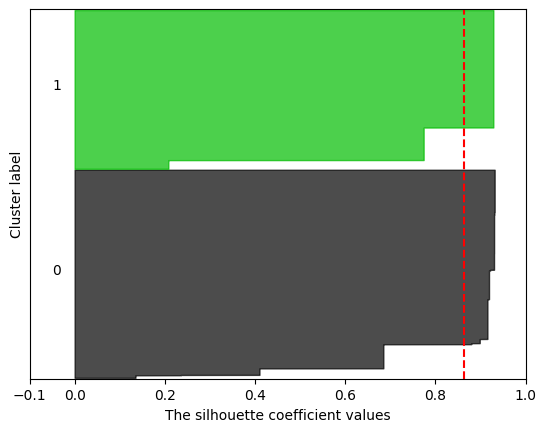

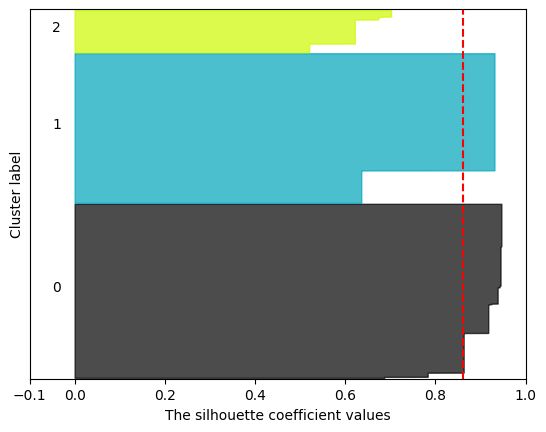

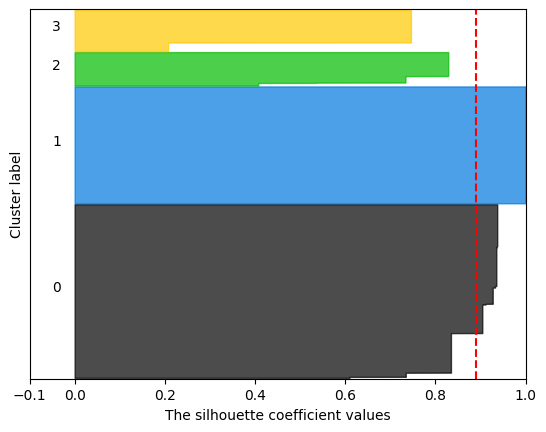

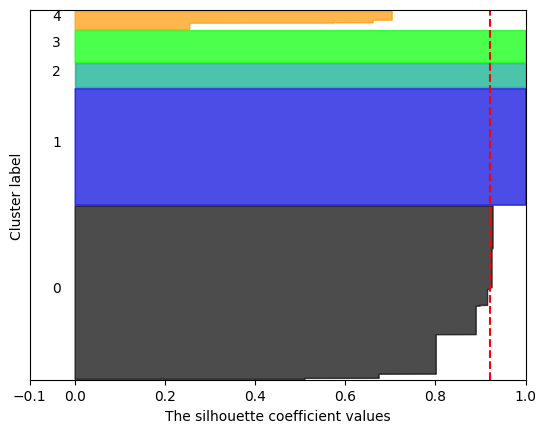

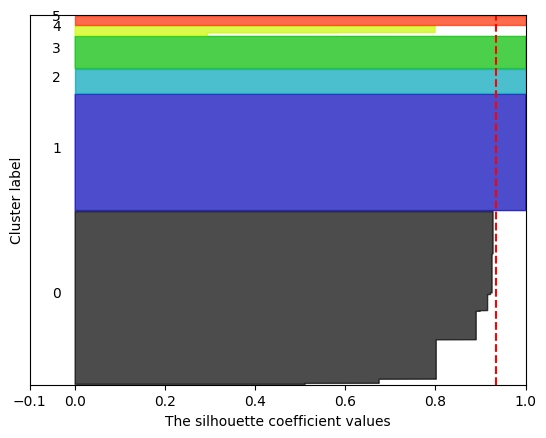

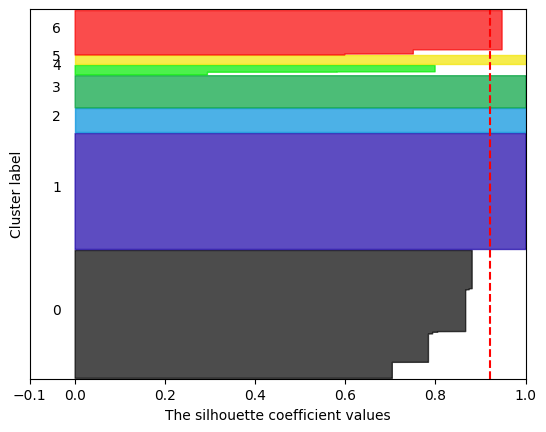

In [ ]:
from sklearn.metrics import silhouette_samples,silhouette_score
import matplotlib.cm as cm
import numpy as np

range_n_clusters =[2,3,4,5,6,7]

for n_clusters in range_n_clusters:
    #craete a subplot with 1 row and 2 columns
    fig,ax1 = plt.subplots(1,1)
    ax1.set_xlim([-0.1,1])
    ax1.set_ylim([0,len(df_clustering) + (n_clusters+1)*10])

    clusterer = KMeans(n_clusters=n_clusters,random_state=10)
    cluster_labels = clusterer.fit_predict(df_clustering)

    silhouette_avg = silhouette_score(df_clustering,cluster_labels)
    print("For n_clusters = ",n_clusters,
          "the average silhouette_score is :",silhouette_avg)
    #compute teh silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_clustering,cluster_labels)

    y_lower=10
    for i in range(n_clusters):
      ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels==i]
      ith_cluster_silhouette_values.sort()
      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.nipy_spectral(float(i)/n_clusters)
      ax1.fill_betweenx(np.arange(y_lower,y_upper),
                        0,ith_cluster_silhouette_values,
                        facecolor=color,edgecolor=color,alpha=0.7)

      #label the silhouette plots with their clusters numbers at the middle
      ax1.text(-0.05,y_lower+0.5*size_cluster_i,str(i))
      #compute the new y_lower for next plot
      y_lower = y_upper+10 #110 fpr the 0 samples

    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    #the vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg,color='red',linestyle='--')
    ax1.set_yticks([]) #clear the yaxis labels
    ax1.set_xticks([-0.1,0,0.2,0.4,0.6,0.8,1])

plt.show()




In [ ]:
kmeans_model = KMeans(n_clusters=5)
kmeans_model.fit(df_clustering)

KMeans(n_clusters=5)

In [ ]:
from sklearn.cluster import KMeans
import seaborn as sns

optimal_k=5 #example value
#build the K_Means model
kmeans =KMeans(n_clusters=optimal_k,random_state=42)
df['Cluster'] = kmeans.fit_predict(df_clustering)
df['Cluster']

0       1
1       1
2       1
3       1
4       1
       ..
4194    1
4195    1
4196    1
4197    1
4198    1
Name: Cluster, Length: 4199, dtype: int32

In [ ]:
cluster_centroid = kmeans_model.cluster_centers_
cluster_centroid

array([[3.57536304e-01, 6.05908863e-02, 1.04056084e+06, 1.83237356e+02,
        2.92939409e+01, 1.68586213e-01],
       [5.34226190e-01, 2.24702381e-01, 2.50000000e+07, 1.77500000e+02,
        2.57500000e+01, 2.23338294e-01],
       [5.81196581e-01, 2.22222222e-01, 7.64102564e+06, 1.86726496e+02,
        2.71452991e+01, 2.10826211e-01],
       [1.95710456e-01, 6.43431635e-02, 2.00000000e+07, 1.84651475e+02,
        2.59651475e+01, 9.78552279e-02],
       [6.11940299e-01, 1.11940299e-01, 1.34728977e+07, 1.83417910e+02,
        2.41492537e+01, 2.93532338e-01]])

In [ ]:
labels=kmeans_model.labels_
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

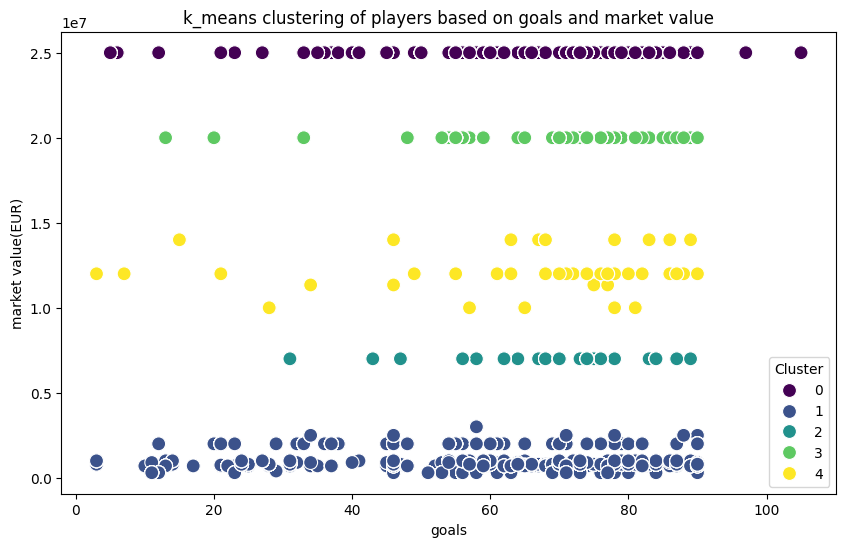

In [ ]:
#visualize clusters based on 2 features(goals and market_value)
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['minute'],y=df['market_value_in_eur'],hue=df['Cluster'],palette='viridis',s=100)
plt.title('k_means clustering of players based on goals and market value')
plt.xlabel('goals')
plt.ylabel('market value(EUR)')
plt.show()


**Interpretation**:Cluster 0 (Purple): These players have a high market value but a relatively low number of goals. This cluster might represent players with high potential or those who contribute to the team in ways other than scoring (e.g., defensive midfielders, playmakers).
Cluster 1 (Teal): This cluster shows players with a moderate market value and a moderate number of goals. They likely represent a mix of players with balanced offensive and defensive contributions.
Cluster 2 (Yellow): This cluster consists of players with a low market value and a low number of goals. These players might be younger, less experienced, or players who play in less prominent roles.
Cluster 3 (Green): This cluster is characterized by players with a moderate market value and a higher number of goals. These players are likely key attacking players who contribute significantly to the team's scoring.
Cluster 4 (Dark Purple): This cluster represents players with high market value and a high number of goals. These are likely top-tier players who are highly valuable due to their significant offensive contributions.

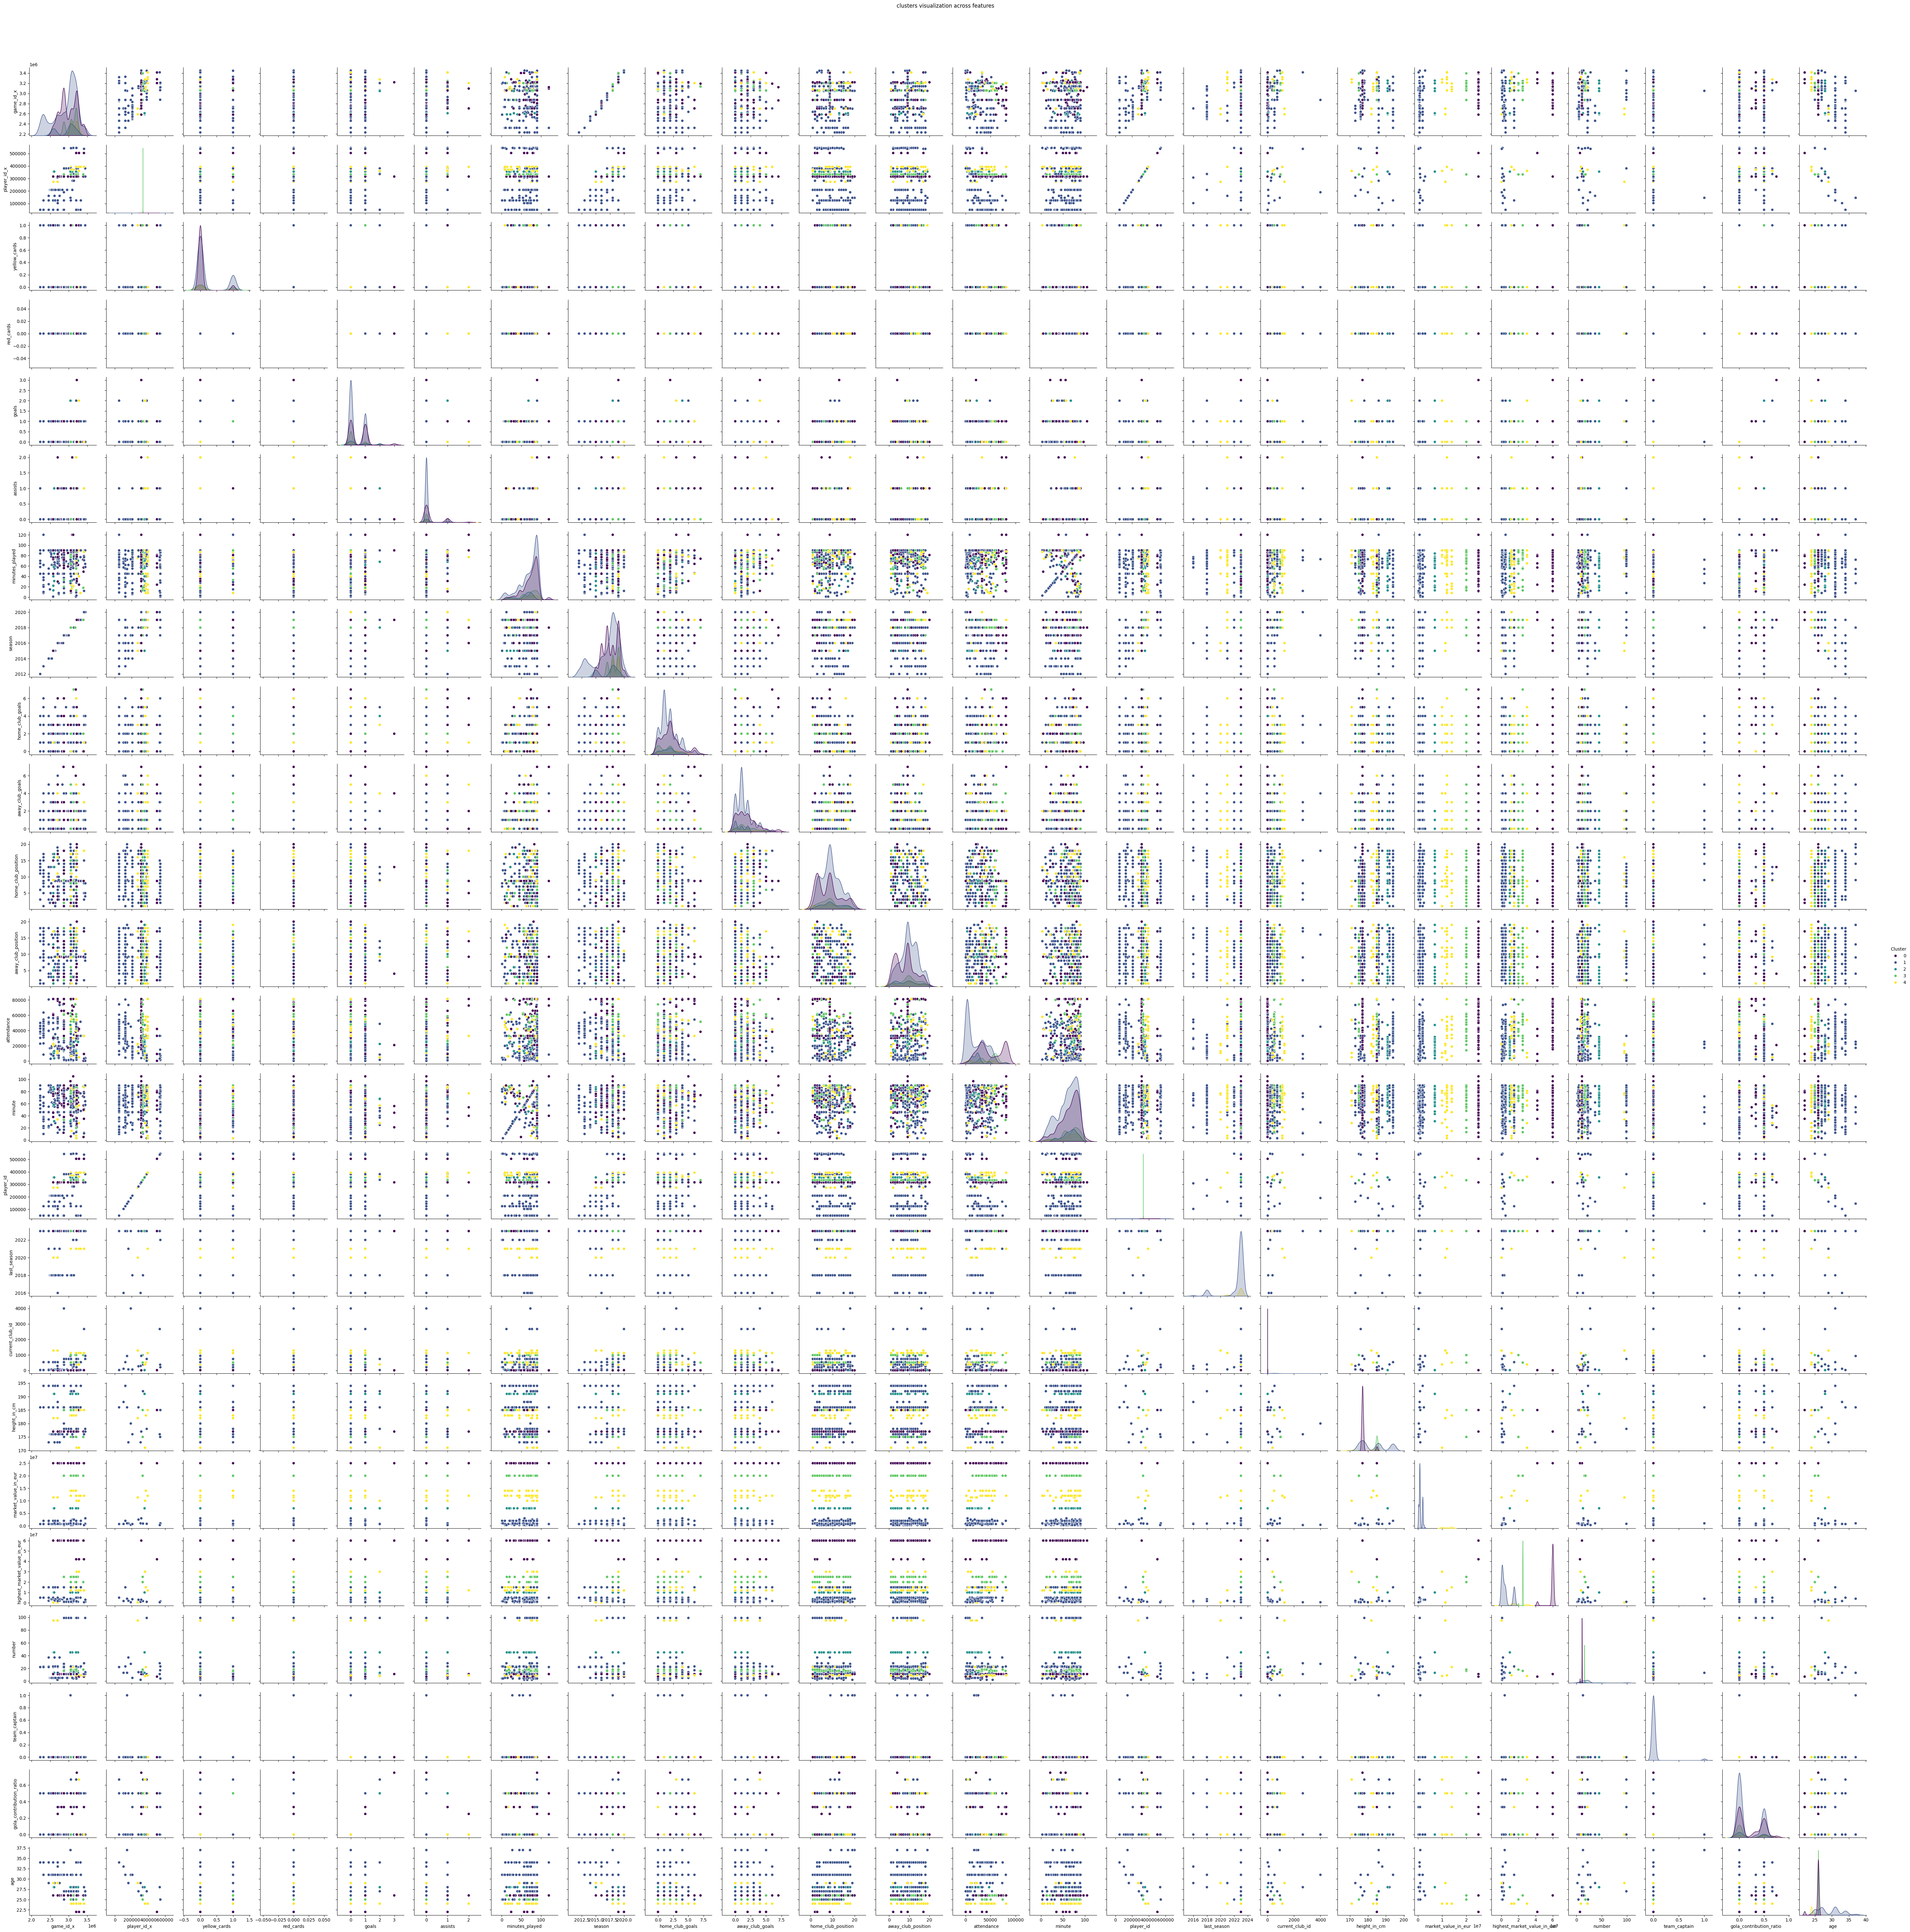

In [ ]:
#pair plot for all numeric columns
sns.pairplot(df,hue='Cluster',diag_kind='kde',palette='viridis')
plt.suptitle('clusters visualization across features',y=1.02)
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score
silhouette = silhouette_score(df_clustering,df['Cluster'])
print(f"silhouette score:{silhouette:.3f}")

silhouette score:0.920


**Interpretation:**A silhouette score of 0.920 reflects strong clustering performance, meaning that the chosen number of clusters and the algorithm used have created well-separated and cohesive clusters. This suggests the clustering model is highly effective at grouping similar data points together while keeping different groups distinct.

In [ ]:
calinski_harabasz = calinski_harabasz_score(df_clustering,df['Cluster'])
print(f"calinski-harabasz index:{calinski_harabasz:.3f}")


calinski-harabasz index:341426.680


**Interpretation:**A Calinski-Harabasz Index of 341426.68 suggests that the clustering model performs exceptionally well, creating distinct and cohesive clusters with minimal overlap. This is a strong indicator that the clustering solution is both optimal and reliable.

In [ ]:
davies_bouldin = davies_bouldin_score(df_clustering,df['Cluster'])
print(f"Davies-Bouldin Index:{davies_bouldin:.3f}")

Davies-Bouldin Index:0.240


**Interpretation:**A Davies-Bouldin Index of 0.240 reflects outstanding clustering performance, indicating that the model has formed clusters that are both tight and distinct. This is a strong indication that the clustering solution is highly effective, with very little overlap between the clusters.